In [1]:
import kagome, qiskit
import numpy as np
import matplotlib.pyplot as plt

startTime = kagome.strtime()
print(f"Start at {startTime}\n")
qVersion=kagome.init_notebook(output=True)

import qiskit.tools.jupyter
%qiskit_version_table

Start at Mon Feb 27 15:02:29 2023 UTC

qTools: myTools(major=1, minor=1, micro=0)
Qiskit: <dict>
    qiskit-terra : 0.22.4
    qiskit-aer : 0.11.2
    qiskit-ignis : 0.7.1
    qiskit-ibmq-provider : 0.19.2
    qiskit : 0.39.5
    qiskit-nature : 0.5.2
    qiskit-finance : 0.3.4
    qiskit-optimization : 0.4.0
    qiskit-machine-learning : None



In [2]:
# Setup Account, Provider, Service and Backends
from qiskit_ibm_runtime import (QiskitRuntimeService, Session, Options,
                                Estimator as RuntimeEstimator)

provider, service = kagome.get_provider(channel='ibm_quantum',
                                        hub='ibm-q', group='open', project='main',
                                        output=True,   # Print out the available backends
                                       )

from qiskit.providers.fake_provider import FakeGuadalupe
guadalupeFake    = FakeGuadalupe()
simulator        = provider.get_backend('simulator_statevector')

nairobi          = provider.get_backend('ibm_nairobi')
oslo             = provider.get_backend('ibm_oslo')
jakarta          = provider.get_backend('ibmq_jakarta')
perth            = provider.get_backend('ibm_perth')
lagos            = provider.get_backend('ibm_lagos')

Available backends
	ibmq_lima
	ibm_perth
	ibmq_jakarta
	simulator_extended_stabilizer
	simulator_mps
	ibm_lagos
	simulator_stabilizer
	ibmq_manila
	ibm_nairobi
	ibmq_qasm_simulator
	ibmq_quito
	ibmq_belem
	simulator_statevector
	ibm_oslo


In [ ]:
import importlib
import jTools
importlib.reload(hamiltonians)
importlib.reload(ansatze)
importlib.reload(kagome)
# importlib.reload(statevector)
# importlib.reload(kagome)
jTools.cellOutputAll()

# Hamiltonians and Ansatze

In [ ]:
# eigenvalue_results = kagome.load_object('eigenvalues.dump')
# # del eigenvalue_results['5_7']
# # del eigenvalue_results['5_16']
# eigenvalue_results
# kagome.save_object(eigenvalue_results,'eigenvalues.dump')
# # eigenvalue_results

In [3]:
# import statevector
import hamiltonians, ansatze
backends = {'7':oslo,'16':FakeGuadalupe(),
            'j':jakarta,'o':oslo,
            'n':nairobi,'p':perth,'l':lagos,            
            'g':FakeGuadalupe(),}
#===================  Cell Structures ===================#
cells = hamiltonians.init_cells()
positions = hamiltonians.init_positions()

#====================  Hamiltonians =====================#
hams,eigenvalue_results,targets = hamiltonians.init_hamiltonians(cells=cells,force=False, k=128)
print("Hamiltonian Dimensions")
for key,value in hams.items():
    print(f"\t{key}:\t{value.primitive.dim}")
    
#=======================  Ansatze =======================#
Anzs = ansatze.init_ansatze(H=hams,backends=backends,targets=targets)
ansatze.list_Ansatz(Anzs)


H12_12: Edges 18 Eigenvalues 128 
	-18.0000:[2]
	-16.9613:[3]
	-16.9449:[6]
	-16.9296:[6]
	-16.8098:[3]
	-16.7353:[1]
	-16.7293:[2]
	-16.5674:[2]
	-16.3117:[3]
	-16.2754:[6]
	-16.2259:[1]
	-16.0412:[6]
	-15.6539:[3]
	-15.4601:[2]
	-15.3308:[3]
	-15.3178:[5]
	-15.1668:[10]
	-15.0882:[1]
	-14.9331:[1]
	-14.9271:[6]
	-14.8826:[10]
	-14.8709:[6]
	-14.8105:[3]
	-14.6673:[6]
	-14.6577:[5]
	-14.5607:[10]
	-14.4882:[3]
	-14.4583:[5]
	-14.2980:[2]
	-13.9776:[3]
	-13.8805:[2]
	-13.8475:[1]

H12_16: Edges 18 Eigenvalues 128 
	-18.0000:[32]
	-16.9613:[48]
	-16.9449:[48]

H4_7: Edges 4 Eigenvalues 128 
	 -6.0000:[8]
	 -4.0000:[24]
	 -2.0000:[32]
	  2.0000:[24]
	  4.0000:[40]

H4_4: Edges 4 Eigenvalues 16 
	 -6.0000:[1]
	 -4.0000:[3]
	 -2.0000:[4]
	  2.0000:[3]
	  4.0000:[5]

H3_3: Edges 3 Eigenvalues 8 
	 -3.0000:[4]
	  3.0000:[4]

Hsq_4: Edges 4 Eigenvalues 16 
	 -8.0000:[1]
	 -4.0000:[3]
	 -0.0000:[7]
	  4.0000:[5]

Hsq_7: Edges 4 Eigenvalues 128 
	 -8.0000:[8]
	 -4.0000:[24]
	 -0.0000:[56]
	  4

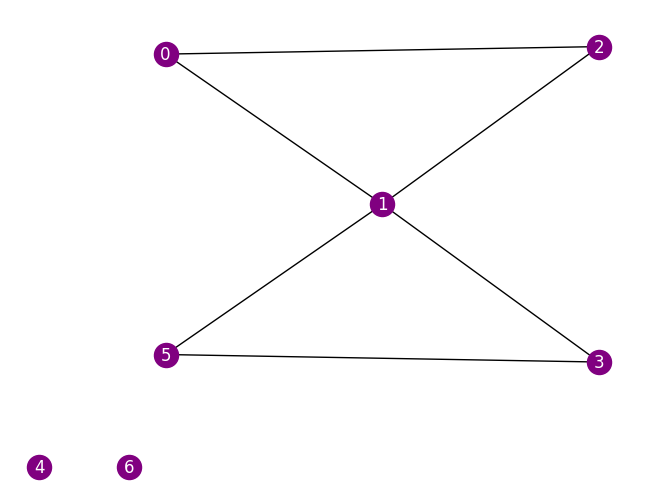

In [4]:
# for key in cells:
#     print(key16

key='5_7'
_=kagome.draw_lattice(cells[key],positions[key])

# Optimizer Options

In [5]:
optimizers={}
from qiskit.algorithms.optimizers import SPSA
optimizers['00'] = {'opt': SPSA(maxiter=5), 'label':'SPSA(5)' }
optimizers['01'] = {'opt': SPSA(maxiter=75), 'label':'SPSA(75)' }
optimizers['02'] = {'opt': SPSA(maxiter=75,callback=kagome.SPSA_callback), 
                    'label':'SPSA(75,cb)' }
optimizers['03'] = {'opt': SPSA(maxiter=75,callback=kagome.SPSA_callback,blocking=True),
                    'label':'SPSA(75,cb,block)' }
optimizers['04'] = {'opt': SPSA(maxiter=150,callback=kagome.SPSA_callback),
                    'label':'SPSA(150,cb)' }
optimizers['05'] = {'opt': SPSA(maxiter=150,callback=kagome.SPSA_callback,blocking=True),
                    'label':'SPSA(150,cb,block)' }
optimizers['06'] = {'opt': SPSA(maxiter=300,callback=kagome.SPSA_callback),
                    'label':'SPSA(300,cb)' }
optimizers['07'] = {'opt': SPSA(maxiter=300,callback=kagome.SPSA_callback,blocking=True),
                    'label':'SPSA(300,cb,block)' }
optimizers['08'] = {'opt': SPSA(maxiter=150,callback=kagome.SPSA_callback,trust_region=True),
                    'label':'SPSA(150,cb,trust)' }
optimizers['09'] = {'opt': SPSA(maxiter=300,callback=kagome.SPSA_callback,trust_region=True),
                    'label':'SPSA(300,cb,trust)' }
optimizers['10'] = {'opt': SPSA(maxiter=300,callback=kagome.SPSA_callback,second_order=True),
                    'label':'SPSA(300,cb,O(2)' }
optimizers['11'] = {'opt': SPSA(maxiter=100,callback=kagome.SPSA_callback),
                    'label':'SPSA(100,cb)' }
optimizers['12'] = {'opt': SPSA(maxiter=100,callback=kagome.SPSA_callback,trust_region=True),
                    'label':'SPSA(100,cb,trust)' }
optimizers['13'] = {'opt': SPSA(maxiter=350,callback=kagome.SPSA_callback),
                    'label':'SPSA(350,cb)' }
optimizers['14'] = {'opt': SPSA(maxiter=200,callback=kagome.SPSA_callback),
                    'label':'SPSA(200,cb)' }

In [6]:
from qiskit_aer import AerSimulator, StatevectorSimulator

# from .aerbackend import AerBackend, AerError
max_parallel=3
nairobiSim   = AerSimulator(max_parallel_experiments=max_parallel).from_backend(nairobi)

svectorSim   = StatevectorSimulator(max_parallel_experiments=max_parallel)
nairobiSim   = AerSimulator(max_parallel_experiments=max_parallel).from_backend(nairobi)
osloSim      = AerSimulator(max_parallel_experiments=max_parallel).from_backend(oslo)
jakartaSim   = AerSimulator(max_parallel_experiments=max_parallel).from_backend(jakarta)
perthSim     = AerSimulator(max_parallel_experiments=max_parallel).from_backend(perth)
lagosSim     = AerSimulator(max_parallel_experiments=max_parallel).from_backend(lagos)
guadalupeSim = AerSimulator(max_parallel_experiments=max_parallel).from_backend(FakeGuadalupe())

from qiskit.primitives import BackendEstimator
backendNairobi = BackendEstimator(nairobiSim, skip_transpilation=False)

In [30]:
fname='H5_7_p.dump'
perthCache = kagome.load_results(fname)
kagome.list_results(perthCache)

Loaded 7 results from H5_7_p.dump
0: 'simulator_statevector['shots':1024 'Optimize':3 'Resilience':1]H:5_7 A:A5_p_SU2_L1Opt:SPSA(200,cb) x0=Random idx=36 simulator_statevector SPSA'
Computed: -6.0 Min -6.0 Target -6.0 Error 0.0% Min 0.0%

1: ''aer_simulator(ibm_perth)['shots':1024 'Optimize':3 'Resilience':1]H:5_7 A:A5_p_SU2_L1Opt:SPSA(200,cb) x0=Random idx=18'
Computed: -5.41 Min -5.488 Target -6.0 Error 9.831% Min 8.529%

2: ''aer_simulator(ibm_perth)['shots':1024 'Optimize':3 'Resilience':1]H:5_7 A:A5_p_SU2_L1Opt:SPSA(200,cb) x0=Random idx=24'
Computed: -5.461 Min -5.613 Target -6.0 Error 8.984% Min 6.445%

3: ''aer_simulator(ibm_perth)['shots':1024 'Optimize':3 'Resilience':1]H:5_7 A:A5_p_SU2_L1Opt:SPSA(200,cb) x0=Random idx=30'
Computed: -5.387 Min -5.523 Target -6.0 Error 10.221% Min 7.943%

4: 'None['shots':1024 'Optimize':3 'Resilience':1]H:5_7 A:A5_p_SU2_L1Opt:SPSA(200,cb) x0=Random idx=21'
Computed: -5.992 Min -6.007 Target -6.0 Error 0.126% Min 0.123%

5: 'None['shots':1024 

In [68]:
import importlib
importlib.reload(kagome)
fname='H5_7_p_comp.dump'
compCache = kagome.load_results(fname)
kagome.list_results(compCache)
fname='H5_7_p.dump'
perthCache = kagome.load_results(fname)
kagome.list_results(perthCache)
print("============== Update Entries =====================")


Loaded 12 results from H5_7_p_comp.dump
0: 'None['shots':1024 'Optimize':3 'Resilience':1]H:5_7 A:A5_p_SU2_L1Opt:SPSA(200,cb) x0=Random idx=0'


1: 'None['shots':1024 'Optimize':3 'Resilience':1]H:5_7 A:A5_p_SU2_L1Opt:SPSA(200,cb) x0=Random idx=1'


2: 'None['shots':1024 'Optimize':3 'Resilience':1]H:5_7 A:A5_p_SU2_L1Opt:SPSA(200,cb) x0=Random idx=2'


3: ''aer_simulator(ibm_perth)['shots':1024 'Optimize':3 'Resilience':1]H:5_7 A:A5_p_SU2_L1Opt:SPSA(200,cb) x0=Random idx=3'


4: ''aer_simulator(ibm_perth)['shots':1024 'Optimize':3 'Resilience':1]H:5_7 A:A5_p_SU2_L1Opt:SPSA(200,cb) x0=Random idx=4'


5: ''aer_simulator(ibm_perth)['shots':1024 'Optimize':3 'Resilience':1]H:5_7 A:A5_p_SU2_L1Opt:SPSA(200,cb) x0=Random idx=5'


6: 'None['shots':1024 'Optimize':3 'Resilience':1]H:5_16 A:A5_g_SU2_L1Opt:SPSA(200,cb) x0=Random idx=13'


7: 'None['shots':1024 'Optimize':3 'Resilience':1]H:5_16 A:A5_g_SU2_L1Opt:SPSA(200,cb) x0=Random idx=14'


8: 'None['shots':1024 'Optimize':3 'Resilience':1]H:5

In [62]:
#================= Problem Setup =====================
fname='H5_7_p_comp.dump'
fname='H5_7_p.dump'
pt_idx = 'Random'        # '0'-> 0 vector; [int] -> point cache; else -> Random
if isinstance(pt_idx,int) and len(curCache) <= pt_idx:
    curCache = kagome.load_results(fname)
x0, expVal =  kagome.getX0(pt_idx,curCache)
runconfig = {'Hkey'         : '5_16', 'fname' : fname,
             'Akey'         : 'A5_g_SU2_L1', 'miniAkey' : 'A5_16_SU2_L1',
             'Okey'         : '14',         # 00->10 02->75 04->150 06->300 13->350 14->200
             'nshots'       : 1024,
             'optimization' : 3,
             'resilience'   : 1,
             'backend'      : None,   'service' : None,  'numRuns' : 1, 
             'forced_xdata' : None, 'x0' : x0,'pt_idx': pt_idx, }
job_tags = {'H':f"H{runconfig['Hkey']}",'A':runconfig['Akey'], 
            'O':f"Opt({runconfig['optimization']}", 'R':f"Res({runconfig['resilience']}",
            'S':f"shots({runconfig['nshots']})",
            }

runconfig['forced_xdata'] = perthCache[7]._callback_points
CurCache = runConfig(runconfig, plot=True, global_seed=177801,
                     updates={'job_tags' : list(job_tags.values())} )
runconfig['forced_xdata'] = perthCache[8]._callback_points
CurCache = runConfig(runconfig, plot=True, global_seed=177801,
                     updates={'job_tags' : list(job_tags.values())} )
runconfig['forced_xdata'] = perthCache[9]._callback_points
CurCache = runConfig(runconfig, plot=True, global_seed=177801,
                     updates={'job_tags' : list(job_tags.values())} )

runconfig['forced_xdata'] = perthCache[10]._callback_points
CurCache = runConfig(runconfig, plot=True, global_seed=177801,
                     updates={'backend': guadalupeSim, 'job_tags' : list(job_tags.values())} )
runconfig['forced_xdata'] = perthCache[11]._callback_points
CurCache = runConfig(runconfig, plot=True, global_seed=177801,
                     updates={'backend': guadalupeSim,'job_tags' : list(job_tags.values())} )
runconfig['forced_xdata'] = perthCache[12]._callback_points
CurCache = runConfig(runconfig, plot=True, global_seed=177801,
                     updates={'backend': guadalupeSim,'job_tags' : list(job_tags.values())} )



curCache = kagome.load_results(fname)

Loaded 13 results from H5_7_p.dump
Starting Run 0
None['shots':1024 'Optimize':3 'Resilience':1]
H:5_16 A:A5_g_SU2_L1
Opt:SPSA(200,cb) x0=Random idx=13
Running a forced data set on Local
Runtime 1 min, 0 sec
Loaded 14 results from H5_7_p.dump
Starting Run 0
None['shots':1024 'Optimize':3 'Resilience':1]
H:5_16 A:A5_g_SU2_L1
Opt:SPSA(200,cb) x0=Random idx=14
Running a forced data set on Local
Runtime 58.7391 sec
Loaded 15 results from H5_7_p.dump
Starting Run 0
None['shots':1024 'Optimize':3 'Resilience':1]
H:5_16 A:A5_g_SU2_L1
Opt:SPSA(200,cb) x0=Random idx=15
Running a forced data set on Local
Runtime 1 min, 1 sec
Loaded 16 results from H5_7_p.dump
Starting Run 0
aer_simulator(fake_guadalupe)['shots':1024 'Optimize':3 'Resilience':1]
H:5_16 A:A5_g_SU2_L1
Opt:SPSA(200,cb) x0=Random idx=16
Running a forced data set on Local Simulator
Runtime 3 min, 36 sec
Loaded 17 results from H5_7_p.dump
Starting Run 0
aer_simulator(fake_guadalupe)['shots':1024 'Optimize':3 'Resilience':1]
H:5_16 A:A5

Compare Edges A:A5_p_SU2_L1 run:4 iteration:400 seed:600976252
qubits [0, 1, 2, 3, 5]
resultsA: None
resultsB: 'aer_simulator(ibm_perth)

expA  =  -5.9291768566
expB  =  -5.4409179688
Delta =  -0.4882588878

Edges
	0,1: A:  0.0489907590  B:  0.0249023438 
	0,2: A: -0.0276053383  B: -0.0183105469 
	1,2: A: -2.9985672398  B: -2.6933593750 
	1,3: A:  0.0056672116  B: -0.0051269531 
	1,5: A:  0.0413523243  B: -0.0080566406 
	3,5: A: -2.9990145733  B: -2.7409667969 

Edge Deltas
	0,1:   0.0240884153
	0,2:  -0.0092947914
	1,2:  -0.3052078648
	1,3:   0.0107941647
	1,5:   0.0494089649
	3,5:  -0.2580477764

ResultsA	ResultsB	A-B	% Diff
[ 4.73186049e-02  1.83369500e-03 -1.61540878e-04 -2.47841668e-02
 -7.89718681e-03  5.07601527e-03 -9.99428575e-01 -9.99591776e-01
 -9.99546888e-01  1.65701855e-02  7.00238989e-04 -1.16032129e-02
  8.27871017e-03  1.07658696e-02  2.23077445e-02 -9.99747402e-01
 -9.99676994e-01 -9.99590177e-01]
[ 3.00292969e-02 -1.02539062e-02  5.12695312e-03 -3.49121094e-02
  0.00

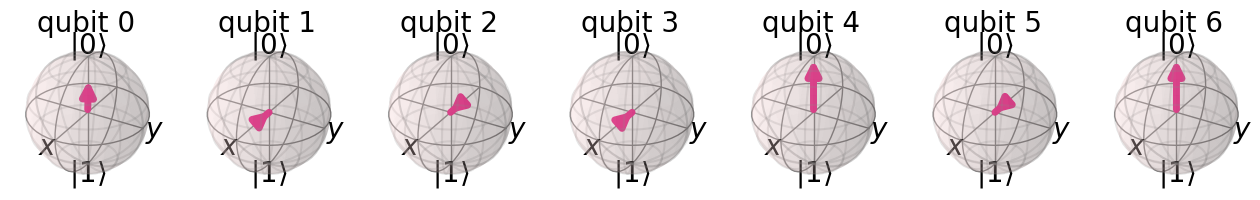

Edge Calculations Completed


In [195]:
###### Compare Edge Results 
# importlib.reload(kagome)
import jTools
jTools.cellOutputAll()
(backendA,backendB,backendC)=(None,perthSim,None)
(Akey,runIdx, iteration) = ('A5_p_SU2_L1',4,400)
(num_qubits,edges,qbitmap) = (7, hamiltonians.edges_5_7, ansatze.qbitmap_5_to_7,)

Xa = perthCache[runIdx]._callback_points[iteration]    # None
H  = hams['edges_5_7'] = hamiltonians.edge_hamiltonians(edges, 7)
A = [ Anzs[Akey] ]*len(H)
x = [ Xa ]*len(H)

random_seed = np.random.randint(1,999999999)
########## Runtime Setup
(optimization, resilience)=(3,1)
nshots=8192
job_tags=['edges']
print(f"Compare Edges A:{Akey} run:{runIdx} iteration:{iteration} seed:{random_seed}"
      f"\nqubits {qbitmap}")
if backendA is None:          ##### None, None #####
    from qiskit.primitives import Estimator
    np.random.seed(random_seed)
    estimator = Estimator(A, H, options={ 'shots': nshots } )
    print(f"resultsA: {backendA}")
    resultsA = kagome.try_estimator( estimator, A, H, x )

if backendB  is not None:     #### AerSimulators ###
    from qiskit.primitives import BackendEstimator
    np.random.seed(random_seed)
    print(f"resultsB: {backendB}")
    backend_estimator = BackendEstimator(backendB, 
                                         skip_transpilation=True,
                                         options={ 'shots': nshots })
    resultsB = kagome.try_estimator(backend_estimator, A, H, x )

if backendC is not None:    ### Backend Estimator
    print(f"Starting Estimator for runtime {backendC}")
    from qiskit_ibm_runtime import Session, Options, Estimator as RuntimeEstimator  
    with Session(service=service, backend=backendC) as session:
        runtime_estimator = RuntimeEstimator(session=session, 
                                     options=Options(optimization_level = optimization, 
                                                     resilience_level  = resilience,
                                                     execution = {'shots':nshots}, 
                                                     environment = {'job_tags': job_tags},
                                                    )
                                    )
        resultsC = kagome.try_estimator(runtime_estimator, [Ap]*nHams, H, [Xa]*nHams )

compare_edge_results(resultsA,resultsB,edges,A=Anzs[Akey],x=Xa)
print(f"Edge Calculations Completed")

In [178]:
backendA=None
backendC=None
idx = 450
if True:
    ##### guadSim ####
    (idxA, idxB) = (8, 10)
    backendB=guadalupeSim
    edges=hamiltonians.edges_5_16
    hams['edges_5_16'] = hamiltonians.edge_hamiltonians(edges, 16)
    Ae = Anzs['A5_g_SU2_L1']
    H=hams['edges_5_16']
    Xa = perthCache[idxA]._callback_points[idx]    # None
#     Xb = compCache[idxB]._callback_points[idx]     # perthSim(None[4])
#     Fa = perthCache[idxA]._callback_data[idx]
#     Fb = compCache[idxB]._callback_data[idx]
#     print(f"nHams:{len(H)}  Fa:{Fa} Fb:{Fb}\nXa:{Xa}\nXb:{Xb}")
else:
    #### perthSim ###
    (idxA, idxB) = (4,3)
    backendB=perthSim
    edges=hamiltonians.edges_5_7
    hams['edges_5_7'] = hamiltonians.edge_hamiltonians(edges, 7)
    Ae = Anzs['A5_p_SU2_L1']
    H=hams['edges_5_7']
    Xa = perthCache[idxA]._callback_points[idx]    # None
#     Xb = compCache[idxB]._callback_points[idx]     # perthSim(None[4])
#     Fa = perthCache[idxA]._callback_data[idx]
#     Fb = compCache[idxB]._callback_data[idx]
#     print(f"nHams:{len(H)}  Fa:{Fa} Fb:{Fb}\nXa:{Xa}\nXb:{Xb}")

# idx = 400
# Xa = perthCache[4]._callback_points[idx]    # None
# Xb = compCache[3]._callback_points[idx]     # perthSim(None[4])
# Fa = perthCache[4]._callback_data[idx]
# Fb = compCache[3]._callback_data[idx]
# print(f"nHams:{nHams}  Fa:{Fa} Fb:{Fb}\nXa:{Xa}\nXb:{Xb}")



# (idxA, idxB) = (7, 10)
# Xa = perthCache[idxA]._callback_points[idx]    # None
# Xb = compCache[idxB]._callback_points[idx]     # perthSim(None[4])
# Fa = perthCache[idxA]._callback_data[idx]
# Fb = compCache[idxB]._callback_data[idx]
# print(f"nHams:{len(H)}  Fa:{Fa} Fb:{Fb}\nXa:{Xa}\nXb:{Xb}")


##### Hams and Points ####
optimization=3
resilience=1
nshots=8192
job_tags=['edges']
nHams = len(H)

A = [ Ae ]*nHams
x = [ Xa ]*nHams
print(f"x:{type(x)}  {len(x)}\n{x[0]}")

if True:
    ##### None, None #####
    from qiskit.primitives import Estimator
    estimator = Estimator([Ap]*nHams, H, options={ 'shots': nshots } )
    print(f"Starting Estimator for None")
    resultsA = kagome.try_estimator( estimator, A, H, x )

    #### AerSimulators ###
    from qiskit.primitives import BackendEstimator
    print(f"Starting Estimator for {backendB}")
    backend_estimator = BackendEstimator(backendB, 
                                         skip_transpilation=True,
                                         options={ 'shots': nshots })
    resultsB = kagome.try_estimator(backend_estimator, A, H, x )

if backendC is not None:
    ## Backend Estimator
    print(f"Starting Estimator for runtime {backendC}")
    from qiskit_ibm_runtime import Session, Options, Estimator as RuntimeEstimator  
    with Session(service=service, backend=backendC) as session:
        runtime_estimator = RuntimeEstimator(session=session, 
                                     options=Options(optimization_level = optimization, 
                                                     resilience_level  = resilience,
                                                     execution = {'shots':nshots}, 
                                                     environment = {'job_tags': job_tags},
                                                    )
                                    )
        resultsC = kagome.try_estimator(runtime_estimator, [Ap]*nHams, H, [Xa]*nHams )

delExp = resultsA.values - resultsB.values
edgeDel = []
print("Edge Delta")
i=0
for idx0 in range(0,len(delExp),3):
    curEdge = delExp[idx0]+delExp[idx0+1]+delExp[idx0+2]
    edgeDel.append(curEdge)
    print(f"{edges[i][0]},{edges[i][1]}:{curEdge}")
    i+=1
    
delTot = np.sum(delExp)
percDelE = 100*delExp/delTot
print(f"\n{resultsA.values}\n{resultsB.values}\n\ndelE={delExp}\nabsDelE={absDelE}")
print(f"\nexpA = {np.sum(resultsA.values)}\n"
      f"expB = {np.sum(resultsB.values)}\n"
      f"\ndelE = {delExp}\n"
      f"\n% = {percDelE}\n"
      f"\ntotDelE = {delTot}")

print(f"Edge Calculations Completed")

x:<class 'list'>  18
[ 1.69342352  3.02789163  1.51656755 -1.72902615 -2.96775764 -3.00717097
  1.79301039 -0.13028     0.08490391 -0.14225841]
Starting Estimator for None
Starting Estimator for aer_simulator(fake_guadalupe)
Edge Delta
0,1:0.023406751201203908
0,2:-0.3328325048346229
1,2:0.022873231920856503
1,7:0.05668180830120148
1,4:-0.016568720749349643
7,4:-0.4162726065185818

[-0.03603926 -0.00350874 -0.04886166 -0.97377241 -0.9671315  -0.99764148
  0.01056371  0.00740299  0.05104911  0.16398129  0.00543125  0.14044309
 -0.15710956 -0.01909954 -0.15261548 -0.9866123  -0.96480071 -0.98634397]
[-1.78222656e-02 -3.17382812e-02 -6.22558594e-02 -8.72070312e-01
 -8.55224609e-01 -8.78417969e-01  4.88281250e-04  1.70898438e-03
  4.39453125e-02  1.03271484e-01  1.02539062e-02  1.39648438e-01
 -1.61132812e-01 -1.78222656e-02 -1.33300781e-01 -8.56201172e-01
 -8.30078125e-01 -8.35205078e-01]

delE=[-0.01821699  0.02822954  0.0133942  -0.1017021  -0.11190689 -0.11922351
  0.01007543  0.005694

In [126]:
print(f"{resultsA.values}\n{resultsB.values}")
print(f"{np.sum(resultsA.values)}\n{np.sum(resultsB.values)}")
# resultsA.values
# resultsA.metadata

[ 0.01819321  0.02003862 -0.0476449  -0.0085913  -0.01748501  0.01241274
 -0.99823187 -0.99884432 -1.00040803  0.01401167  0.03351512 -0.0273228
 -0.01361621 -0.00537363  0.02720619 -1.00014552 -0.9990505  -0.99944953]
[ 0.0546875  -0.01367188 -0.09570312  0.          0.0078125  -0.02929688
 -0.890625   -0.8984375  -0.91015625  0.0234375  -0.02929688 -0.02929688
 -0.0546875  -0.00585938 -0.00585938 -0.921875   -0.93164062 -0.9296875 ]
-5.990786074771942
-5.66015625


Identical X max(delX)=0.0


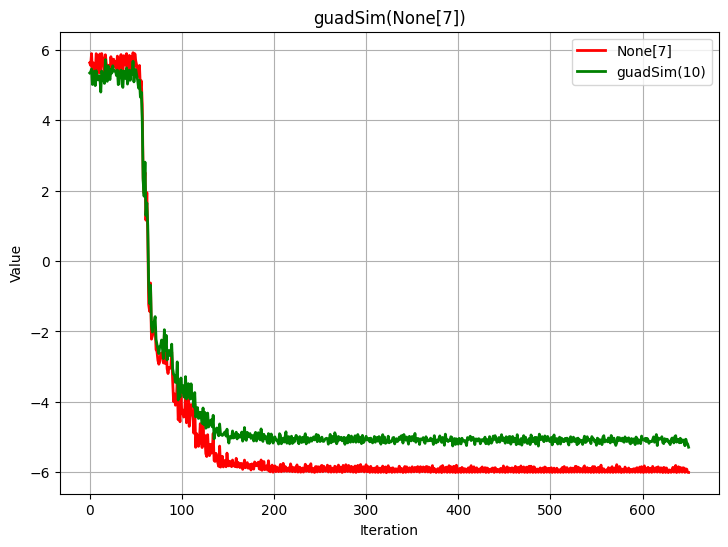

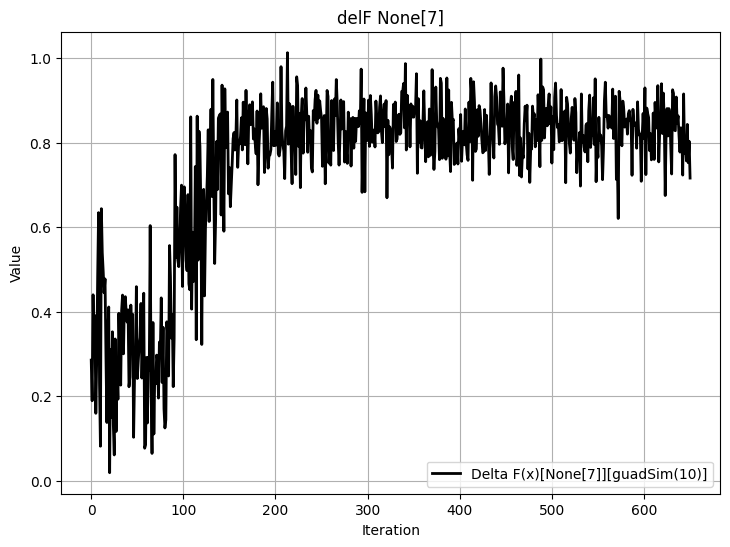

Identical X max(delX)=0.0


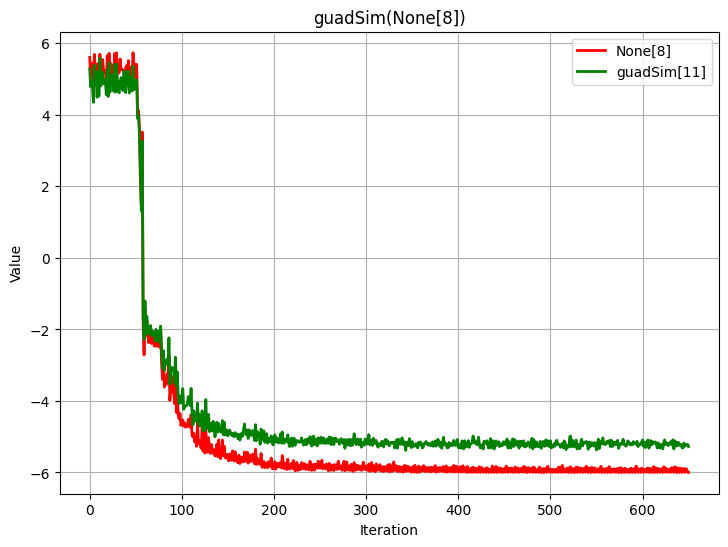

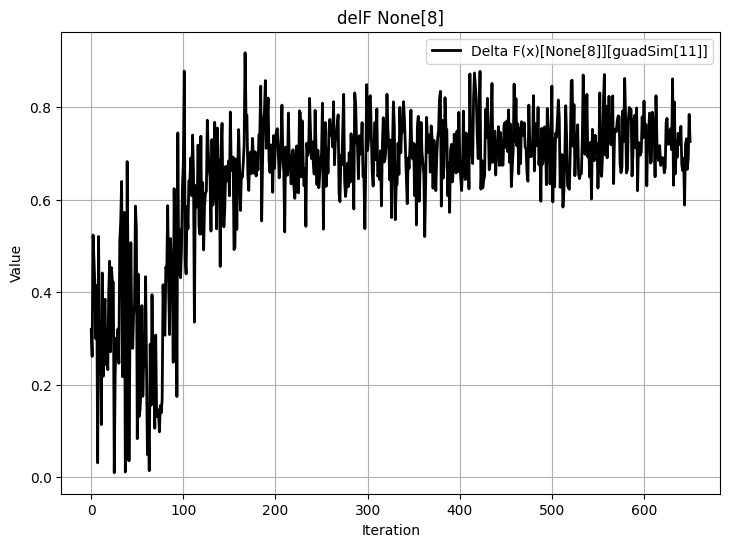

Identical X max(delX)=0.0


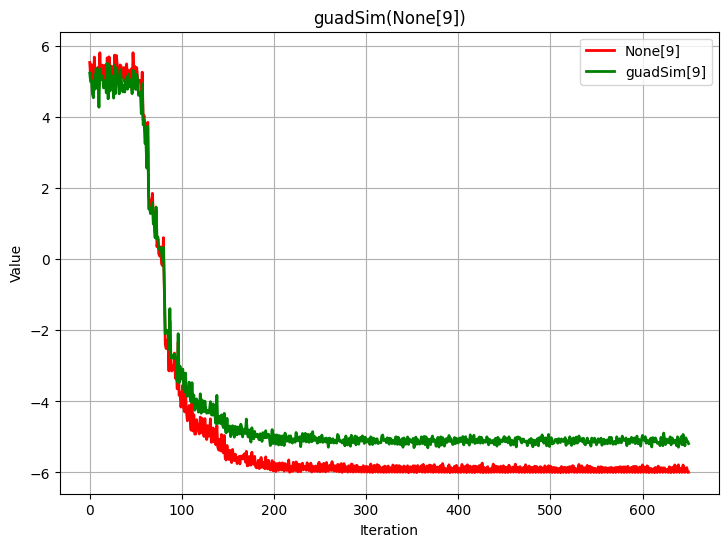

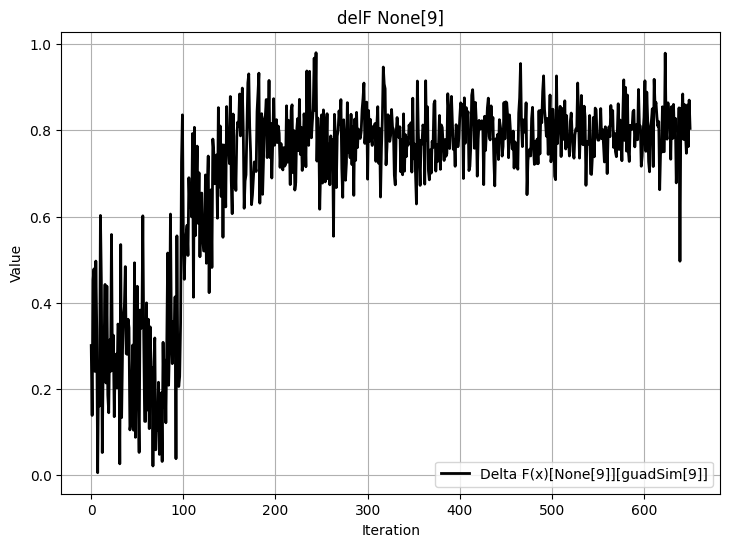

In [71]:
label_dict = {0:'stateVector', 
              1:'perthSim', 2:'perthSim', 3:'perthSim',
              4:'None', 5:'None', 6:'None'}

xdata=[ perthCache[10]._callback_points,
        compCache[9]._callback_points ]
fdata=[ perthCache[10]._callback_data,
        compCache[9]._callback_data ]
compare_forcedX([],label_dict=None,labels=['None[7]','guadSim(10)'],
                xdata=xdata,fdata=fdata, title='guadSim(None[7])') 

xdata=[ perthCache[11]._callback_points,
        compCache[10]._callback_points ]
fdata=[ perthCache[11]._callback_data,
        compCache[10]._callback_data ]
compare_forcedX([],label_dict=None,labels=['None[8]','guadSim[11]'],
                xdata=xdata,fdata=fdata, title='guadSim(None[8])') 

xdata=[ perthCache[12]._callback_points,
        compCache[11]._callback_points ]
fdata=[ perthCache[12]._callback_data,
        compCache[11]._callback_data ]
compare_forcedX([],label_dict=None,labels=['None[9]','guadSim[9]'],
                xdata=xdata,fdata=fdata, title='guadSim(None[9])') 

Identical X max(delX)=0.0


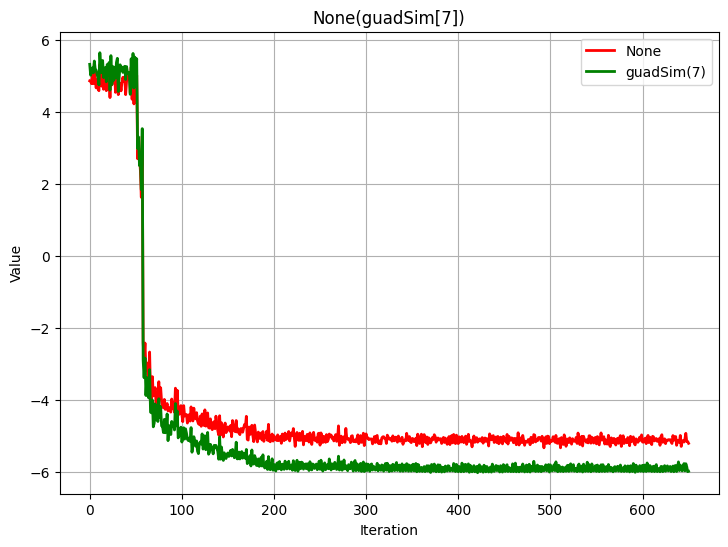

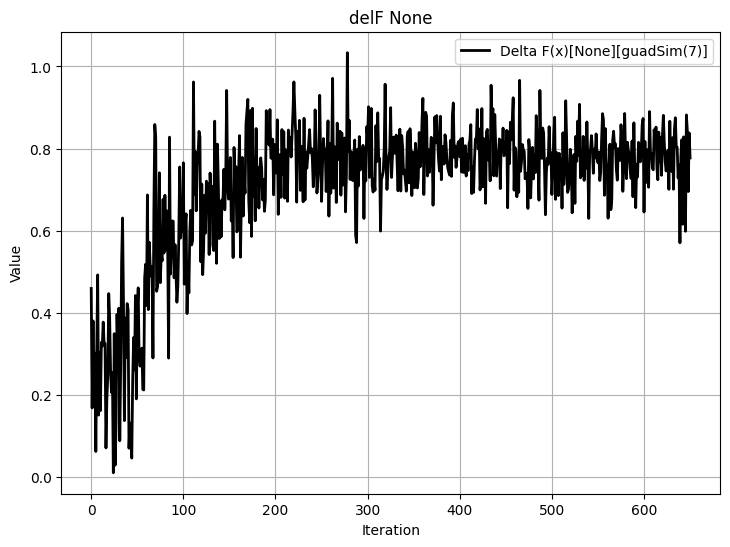

Identical X max(delX)=0.0


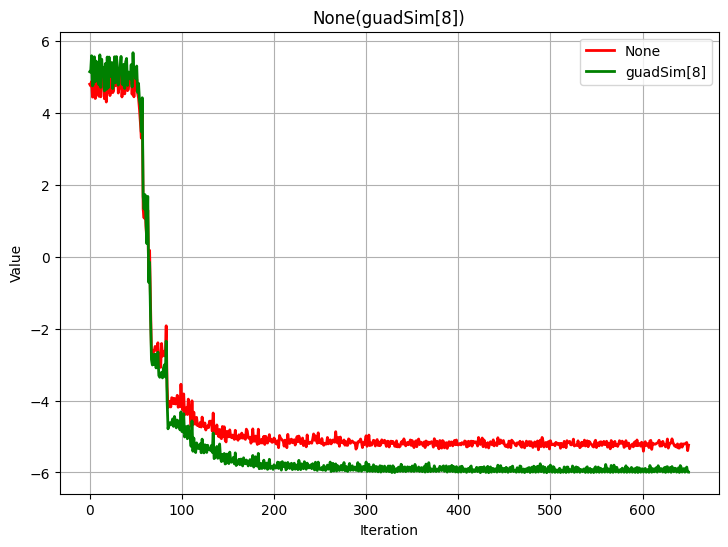

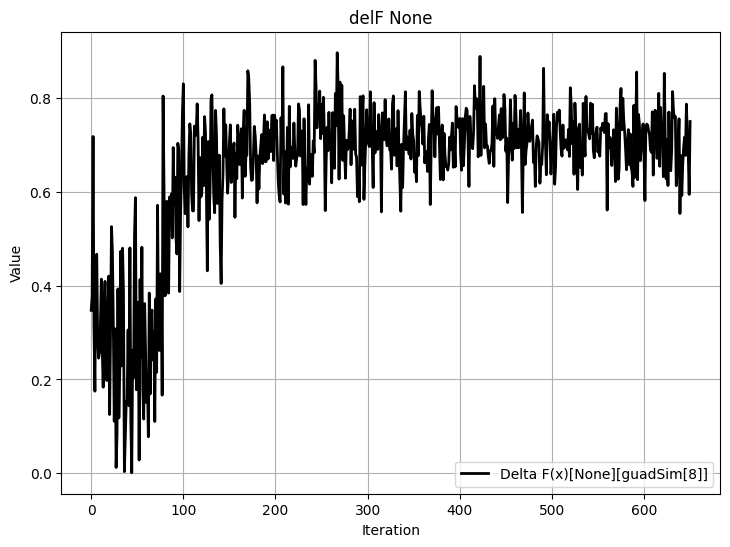

Identical X max(delX)=0.0


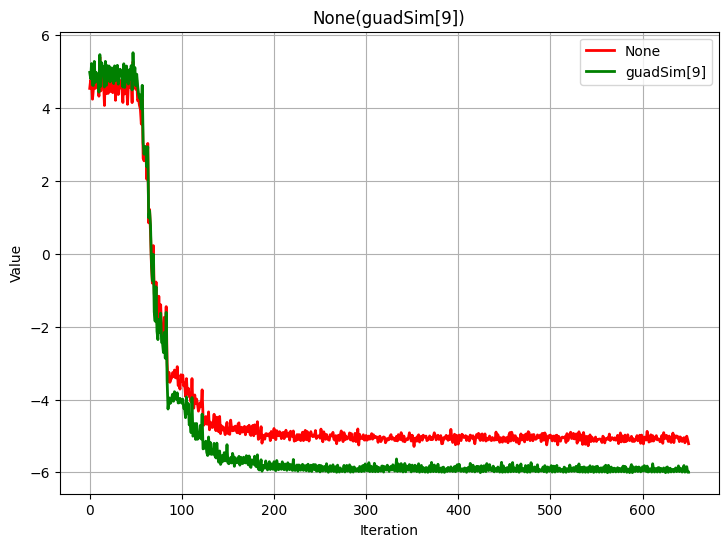

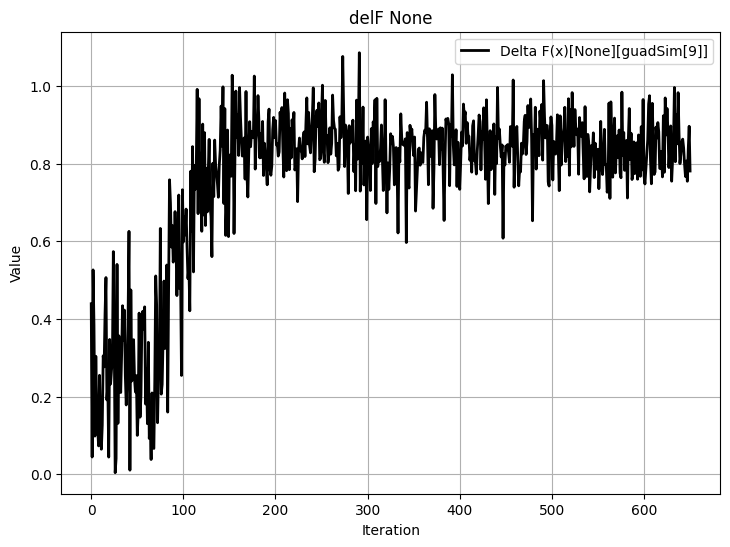

In [70]:
label_dict = {0:'stateVector', 
              1:'perthSim', 2:'perthSim', 3:'perthSim',
              4:'None', 5:'None', 6:'None'}

xdata=[ perthCache[7]._callback_points,
        compCache[6]._callback_points ]
fdata=[ perthCache[7]._callback_data,
        compCache[6]._callback_data ]
compare_forcedX([],label_dict=None,labels=['None','guadSim(7)'],
                xdata=xdata,fdata=fdata, title='None(guadSim[7])') 

xdata=[ perthCache[8]._callback_points,
        compCache[7]._callback_points ]
fdata=[ perthCache[8]._callback_data,
        compCache[7]._callback_data ]
compare_forcedX([],label_dict=None,labels=['None','guadSim[8]'],
                xdata=xdata,fdata=fdata, title='None(guadSim[8])') 

xdata=[ perthCache[9]._callback_points,
        compCache[8]._callback_points ]
fdata=[ perthCache[9]._callback_data,
        compCache[8]._callback_data ]
compare_forcedX([],label_dict=None,labels=['None','guadSim[9]'],
                xdata=xdata,fdata=fdata, title='None(guadSim[9])') 

Identical X max(delX)=0.0


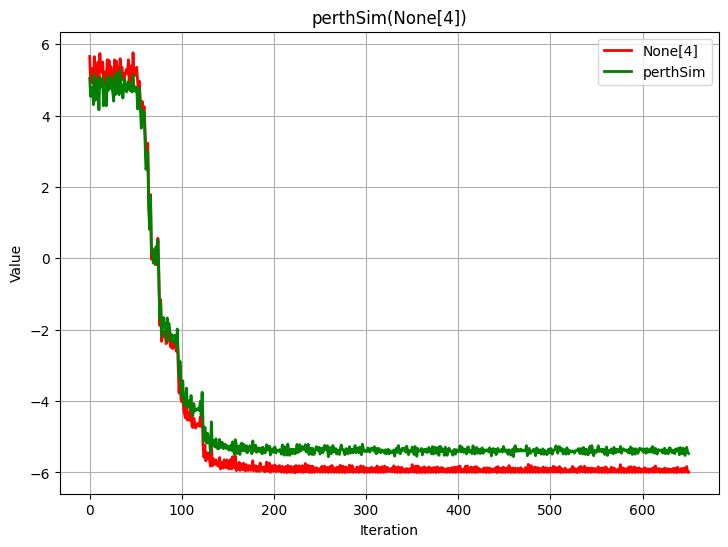

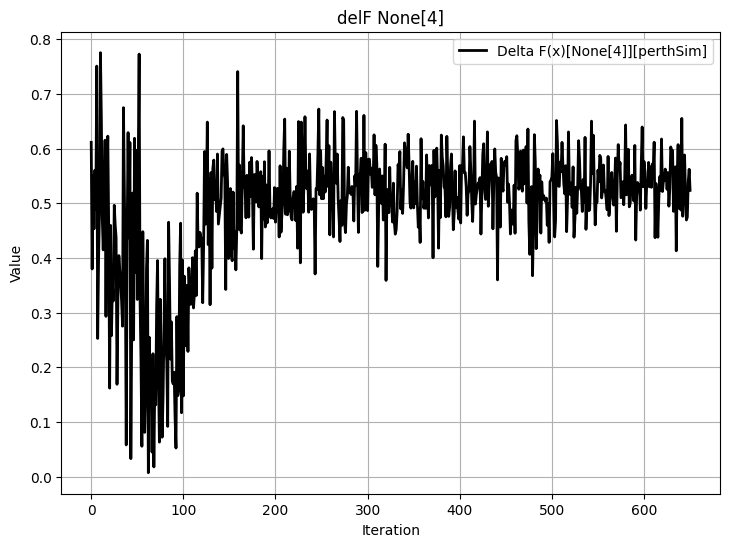

Identical X max(delX)=0.0


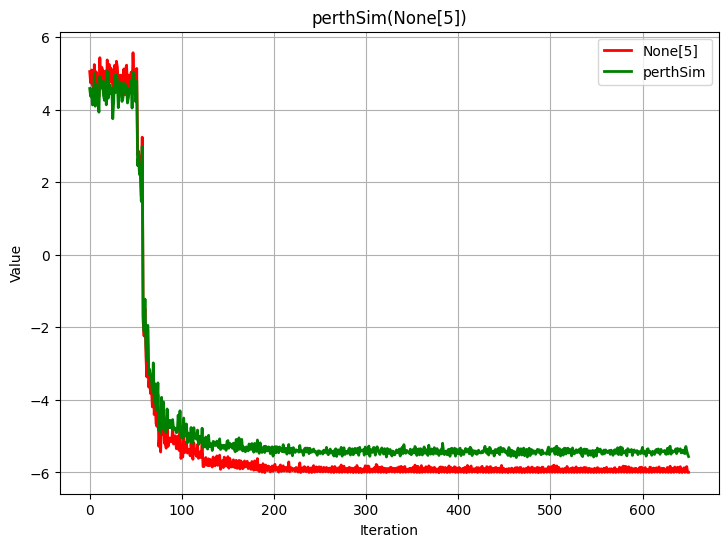

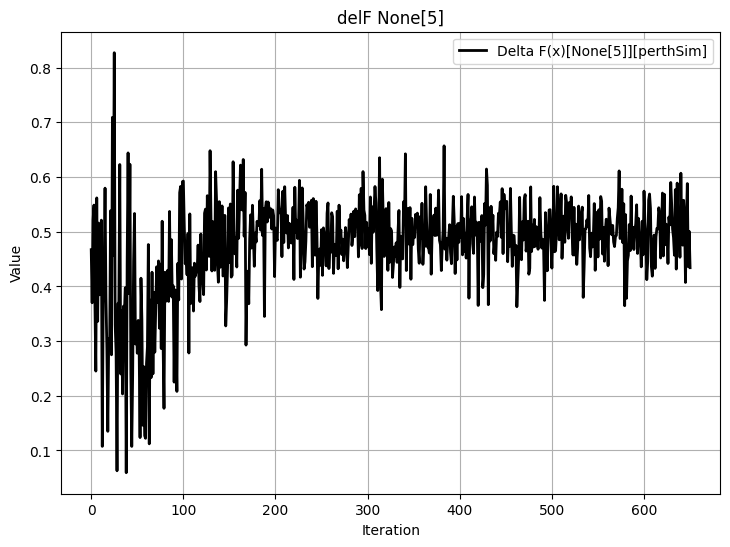

Identical X max(delX)=0.0


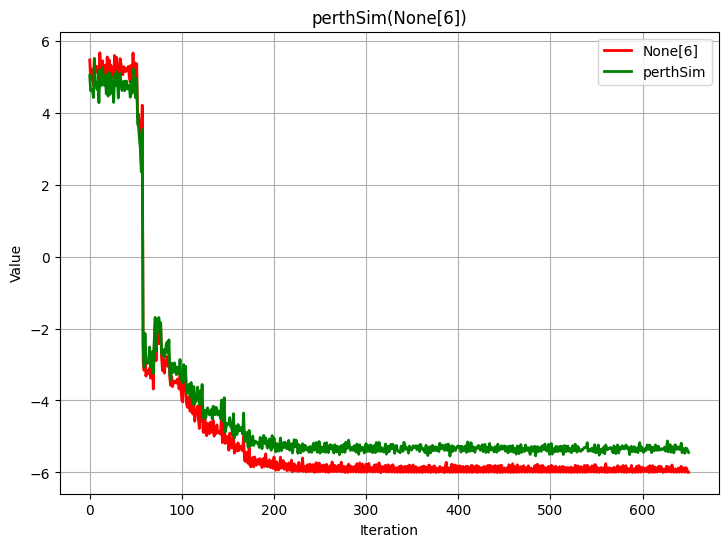

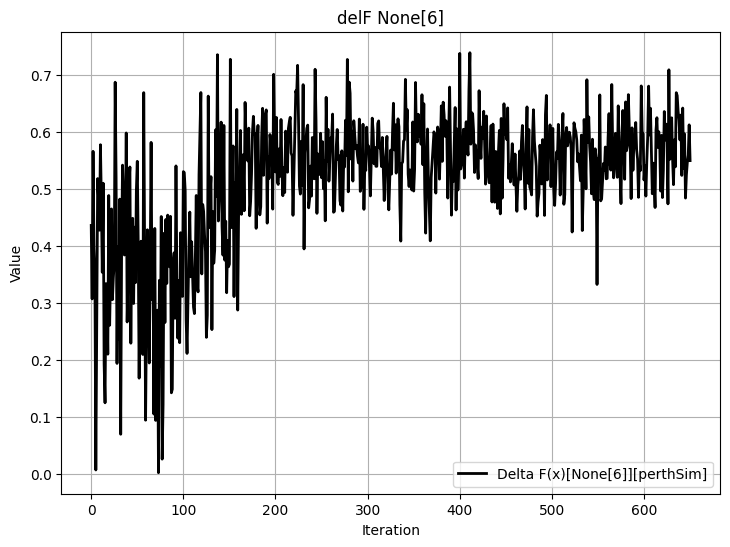

In [50]:
label_dict = {0:'stateVector', 
              1:'perthSim', 2:'perthSim', 3:'perthSim',
              4:'None', 5:'None', 6:'None'}

xdata=[ perthCache[4]._callback_points,
        curCache[3]._callback_points ]
fdata=[ perthCache[4]._callback_data,
        curCache[3]._callback_data ]
compare_forcedX([],label_dict=None,labels=['None[4]','perthSim'],
                xdata=xdata,fdata=fdata, title='perthSim(None[4])') 

xdata=[ perthCache[5]._callback_points,
        curCache[4]._callback_points ]
fdata=[ perthCache[5]._callback_data,
        curCache[4]._callback_data ]
compare_forcedX([],label_dict=None,labels=['None[5]','perthSim'],
                xdata=xdata,fdata=fdata, title='perthSim(None[5])') 

xdata=[ perthCache[6]._callback_points,
        curCache[5]._callback_points ]
fdata=[ perthCache[6]._callback_data,
        curCache[5]._callback_data ]
compare_forcedX([],label_dict=None,labels=['None[6]','perthSim'],
                xdata=xdata,fdata=fdata, title='perthSim(None[6])') 


Identical X max(delX)=0.0


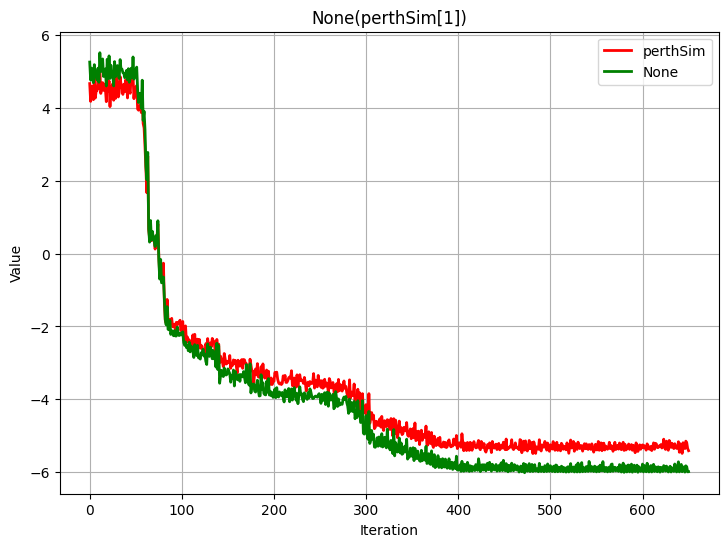

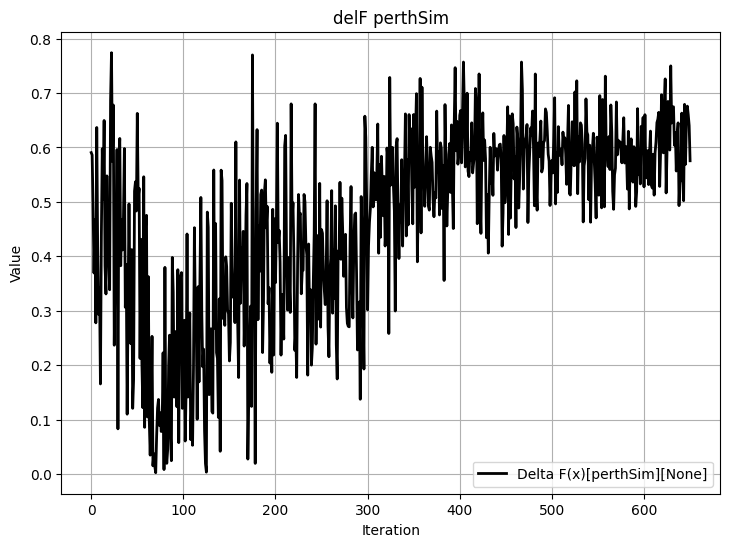

Identical X max(delX)=0.0


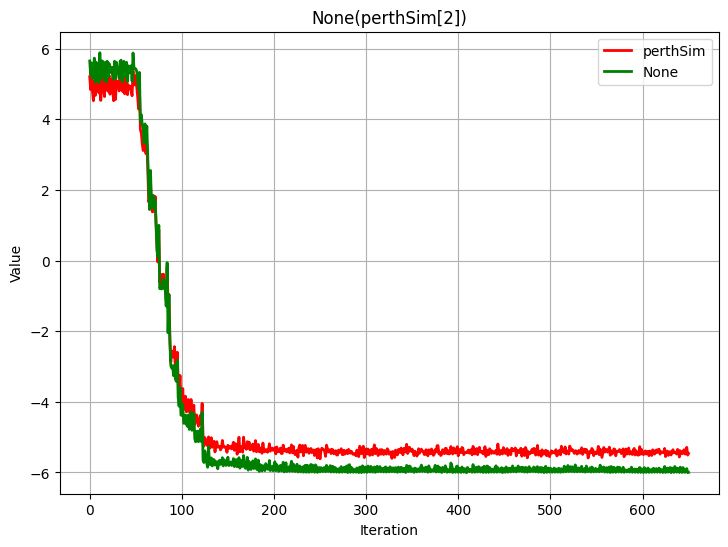

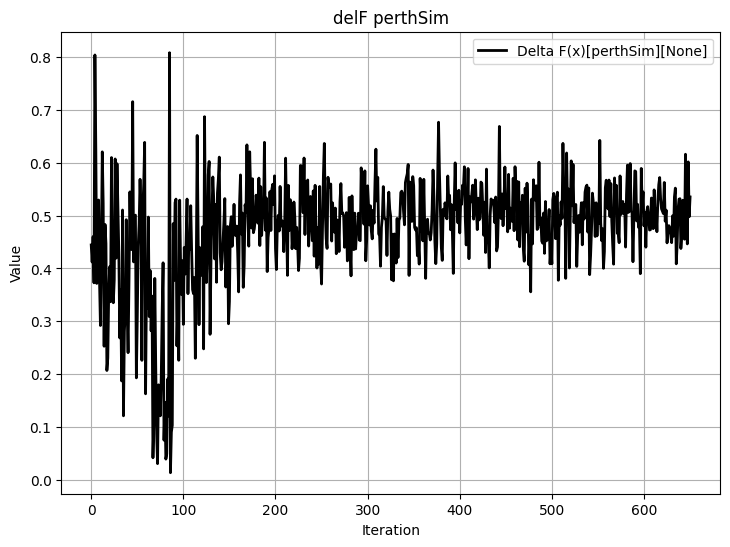

Identical X max(delX)=0.0


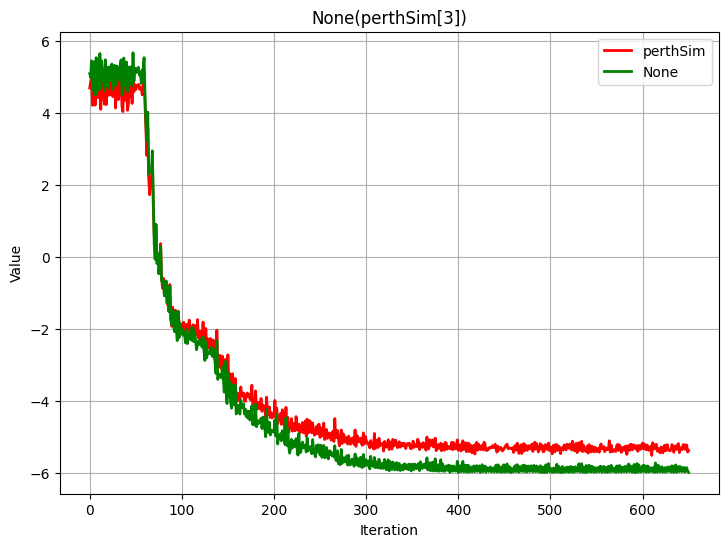

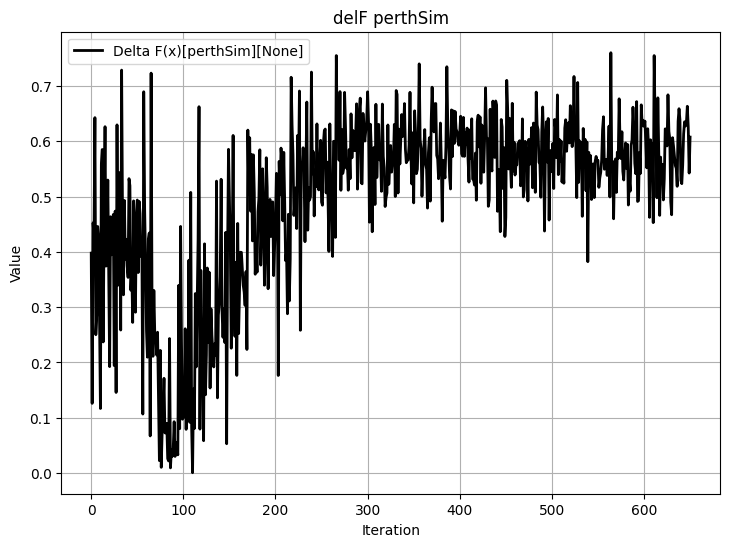

In [49]:
label_dict = {0:'stateVector', 
              1:'perthSim', 2:'perthSim', 3:'perthSim',
              4:'None', 5:'None', 6:'None'}

xdata=[ perthCache[1]._callback_points,
        curCache[0]._callback_points ]
fdata=[ perthCache[1]._callback_data,
        curCache[0]._callback_data ]
compare_forcedX([],label_dict=None,labels=['perthSim','None'],
                xdata=xdata,fdata=fdata, title='None(perthSim[1])') 

xdata=[ perthCache[2]._callback_points,
        curCache[1]._callback_points ]
fdata=[ perthCache[2]._callback_data,
        curCache[1]._callback_data ]
compare_forcedX([],label_dict=None,labels=['perthSim','None'],
                xdata=xdata,fdata=fdata, title='None(perthSim[2])') 

xdata=[ perthCache[3]._callback_points,
        curCache[2]._callback_points ]
fdata=[ perthCache[3]._callback_data,
        curCache[2]._callback_data ]
compare_forcedX([],label_dict=None,labels=['perthSim','None'],
                xdata=xdata,fdata=fdata, title='None(perthSim[3])') 



In [37]:
def runJob(Hkey=None,Akey=None,miniAkey=None,nshots=1024,optimization=3,resilience=1,
           pt_idx='Random',backend=None, Okey=None, numRuns=-1, service=None, x0=None, fname=None,
           forced_xdata = None,
           job_tags=['runJob']):
    from qiskit_aer.backends.aerbackend import AerBackend, AerError
    if backend is None or isinstance(backend,AerBackend):
        service = None
        options = { 'shots': nshots }
    else:
        service = service
        options = Options(optimization_level = optimization, 
                          resilience_level  = resilience,
                          execution = {'shots':nshots}, 
                          environment = {'job_tags':job_tags},
                         )
#                           transpilation = {'skip_translation': False},        

    #==================== Job Control ======================
    label = (f"{backend}['shots':{nshots} 'Optimize':{optimization} 'Resilience':{resilience}]\n"
             f"H:{Hkey} A:{Anzs[Akey].name}\nOpt:{optimizers[Okey]['label']} x0={pt_idx}")
    if numRuns > 0:
        curCache = kagome.load_results(fname)
        for i in range(numRuns):
            print(f"Starting Run {i}")
            custom_vqe = kagome.run_kagomeVQE(hams[Hkey], Anzs[Akey], optimizers[Okey]['opt'], 
                                         miniAnsatz=Anzs[miniAkey],
                                         timeout=None, x0=x0, 
                                         target=np.around(targets[Hkey],6),
                                         service=service, backend=backend,
                                         resultsList=curCache, 
                                         label=label, options=options,
                                         forced_xdata=forced_xdata,)
            kagome.save_results(curCache,fname)
        return curCache
    else:
        print(label)
        
def runConfig(orgConfig,updates=None, plot=False,global_seed=None):
    from qiskit.utils import algorithm_globals
    updates = {} if updates is None else updates
    finalConfig = {key: updates.get(key, orgConfig[key]) for key in orgConfig}
    if global_seed is not None:
        algorithm_globals.random_seed = global_seed   # For SPSA stochastic repeatability
    curCache = runJob(**finalConfig)
    if plot and finalConfig.get('forced_xdata',None) is None:
        kagome.plot_SPSA_convergence(curCache,indices=[-1],conv_lim = 0.03,movingAvg=5,
                                     perc=6,convergence=False,minStart=20)
    return curCache

def compare_forcedX(indices,label_dict=None,labels=['0','1'],title=None,fdata=[],xdata=[]):
    xdiffNorms,fdiffNorms =[],[]
    
    labels=[label_dict[indices[0]],label_dict[indices[1]]] if label_dict is not None else labels
    title=f"{labels[0]}({labels[1]})" if title is None else title
    colors=['red','green']
    
    for idx in indices:
        fdata.append(curCache[idx]._callback_data)
        xdata.append(curCache[idx]._callback_points)
    xdiffs = np.array(xdata[0]) -  np.array(xdata[1])

    delXnorms  = np.linalg.norm(xdiffs,axis=1)
    for curDiff in xdiffs:
        xdiffNorms.append(np.linalg.norm(curDiff))
    fdiffs = np.array(fdata[0]) -  np.array(fdata[1])
    for curDiff in fdiffs:
        fdiffNorms.append(np.linalg.norm(curDiff))

    maxdelX = np.max(delXnorms)
    if maxdelX < 0.001:
        print(f"Identical X max(delX)={maxdelX}")
    kagome.quick_plot(fdata,labels=labels,colors=colors,figsize=(8.5,6), title=title)
    kagome.quick_plot(fdiffNorms,labels=[f"Delta F(x)[{labels[0]}][{labels[1]}]"],title=f'delF {labels[0]}')

    if maxdelX >= 0.001:
        kagome.quick_plot(delXnorms,labels=['||del; X||'],title='||Norm delX||')

In [189]:
def getBlochCoords(state_vector,qubit,num_qubits=None):
    if num_qubits is None:
        num_qubits = len(state_vector.dims())
    if qubit >= num_qubits:
        return None

    from qiskit.quantum_info import SparsePauliOp
    Xop = SparsePauliOp.from_sparse_list([("X", [qubit], 1)], num_qubits=num_qubits)
    Yop = SparsePauliOp.from_sparse_list([("Y", [qubit], 1)], num_qubits=num_qubits)
    Zop = SparsePauliOp.from_sparse_list([("Z", [qubit], 1)], num_qubits=num_qubits)
    x = state_vector.expectation_value(Xop)
    y = state_vector.expectation_value(Yop)
    z = state_vector.expectation_value(Zop)
    return [x,y,z]

def getBlochAngles(state_vector):
    angles = []
    num_qubits = len(state_vector.dims())
    for qbit in range(num_qubits):
        coords = getBlochCoords(state_vector,qbit)
        (r,theta,phi) = cart2bloch(coords)
        angles.append([theta,phi,r])
    return angles

def getCoords(state_vector, num_qubits=None):
    coords = []
    if num_qubits is None:
        num_qubits = len(state_vector.dims())
    for qbit in range(num_qubits):
        coords.append(getBlochCoords(state_vector,qbit,num_qubits=num_qubits))
    return coords

def cart2bloch(pt):
    (x,y,z) = np.real(pt)
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    theta = np.arctan2(hxy,z)
    phi = np.arctan2(y, x)
    return r, theta, phi

def compare_edge_results(resultsA,resultsB,edges, A=None,x=None):
    from qiskit.quantum_info import Statevector
    from qiskit.visualization import plot_bloch_multivector
    
    delExp = resultsA.values - resultsB.values
    delTot = np.sum(delExp)
    percDelE = 100*delExp/delTot
    
    edgeDel = []
    print(f"\nexpA  = {np.sum(resultsA.values):14.10f}"
          f"\nexpB  = {np.sum(resultsB.values):14.10f}"
          f"\nDelta = {delTot:14.10f}")
  
    print("\nEdges")
    (i,edgesA,edgesB)=(0,[],[])
    for idx0 in range(0,len(resultsA.values),3):
        curEdgeA = resultsA.values[idx0]+resultsA.values[idx0+1]+resultsA.values[idx0+2]
        edgesA.append(curEdgeA)
        curEdgeB = resultsB.values[idx0]+resultsB.values[idx0+1]+resultsB.values[idx0+2]
        edgesB.append(curEdgeB)
        print(f"\t{edges[i][0]},{edges[i][1]}: A:{curEdgeA:14.10f}  B:{curEdgeB:14.10f} ")
        i+=1
      
    print("\nEdge Deltas")
    i=0
    for idx0 in range(0,len(delExp),3):
        curEdge = delExp[idx0]+delExp[idx0+1]+delExp[idx0+2]
        edgeDel.append(curEdge)
        print(f"\t{edges[i][0]},{edges[i][1]}: {curEdge:14.10f}")
        i+=1

    print(f"\nResultsA\tResultsB\tA-B\t% Diff\n"
          f"{resultsA.values}\n{resultsB.values}\n{delExp}"
          f"\n{percDelE}\n")
    if A is not None and x is not None:
        print(f"{A.name} at x")
        qc = A.bind_parameters(x)
        svector = Statevector(qc)
        print(f"(r,theta,phi):")       
        angles = getBlochAngles(svector)
        for idx in range(len(angles)) :
            curCoord = angles[idx]
            print(f"\t{idx}: ({curCoord[2]:9.6f},{curCoord[0]:9.6f},{curCoord[1]:9.6f} )")
        return plot_bloch_multivector(svector)

Loaded 7 results from H5_7_p.dump
Skipping iteration 115 with step=0.0
Skipping iteration 125 with step=0.0
Skipping iteration 148 with step=0.0
Skipping iteration 174 with step=0.0
Convergence Failure
Duration 1 hours, 31 min Shots=None Iterations=200 Accepted=100.0 % Rejected=0 min at n=155
Expected -6.0 Ground State: Computed -6.0 Min -6.0 
Error 0.0 % Minimum 0.0 %


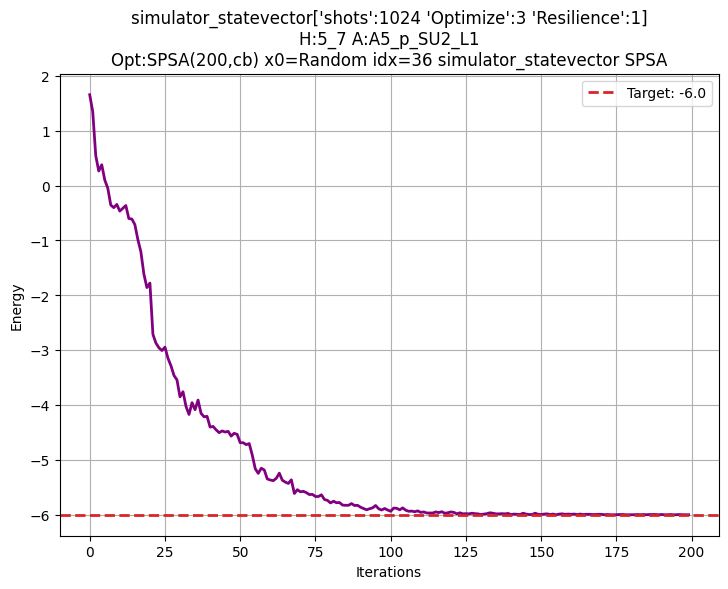

Skipping iteration 19 with step=0.0
Convergence Failure
Duration 4 min, 50 sec Shots=None Iterations=200 Accepted=100.0 % Rejected=0 min at n=143
Expected -6.0 Ground State: Computed -5.410156 Min -5.488281 
Error 9.830729 % Minimum 8.528646 %


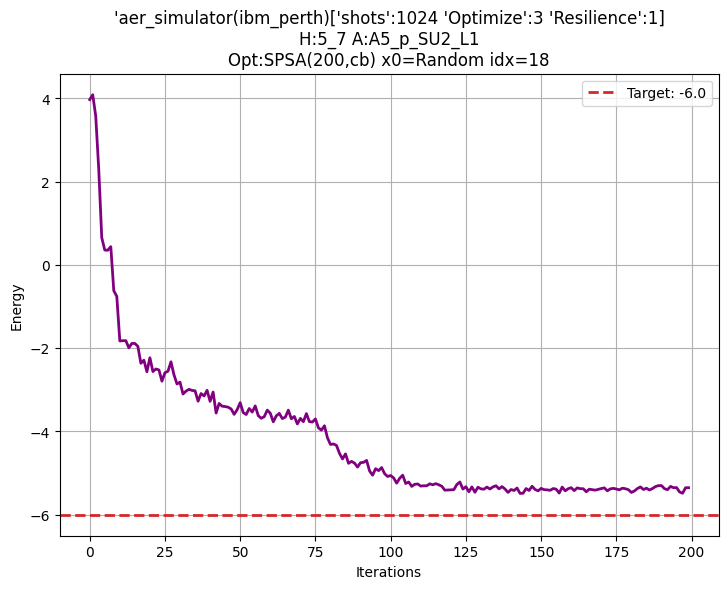

Skipping iteration 47 with step=0.0
Skipping iteration 166 with step=0.0
Convergence Failure
Duration 4 min, 47 sec Shots=None Iterations=200 Accepted=100.0 % Rejected=0 min at n=66
Expected -6.0 Ground State: Computed -5.460938 Min -5.613281 
Error 8.984375 % Minimum 6.445312 %


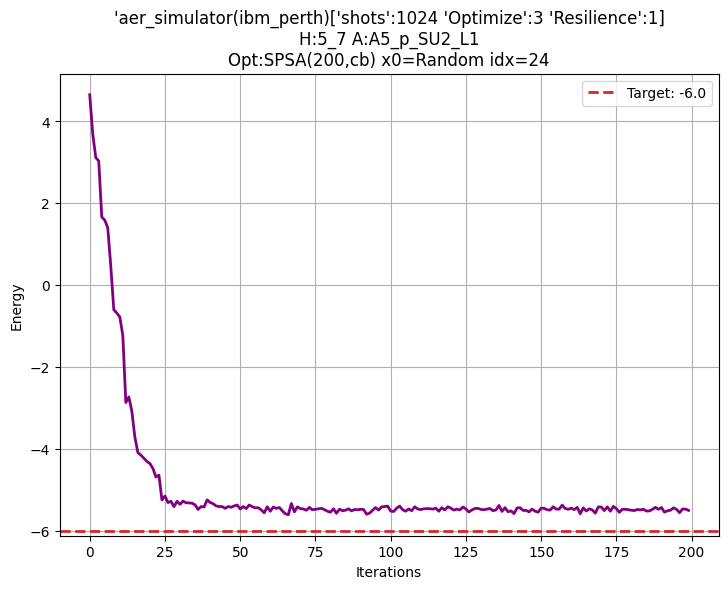

Skipping iteration 23 with step=0.0
Skipping iteration 179 with step=0.0
Convergence Failure
Duration 4 min, 48 sec Shots=None Iterations=200 Accepted=100.0 % Rejected=0 min at n=186
Expected -6.0 Ground State: Computed -5.386719 Min -5.523438 
Error 10.221354 % Minimum 7.942708 %


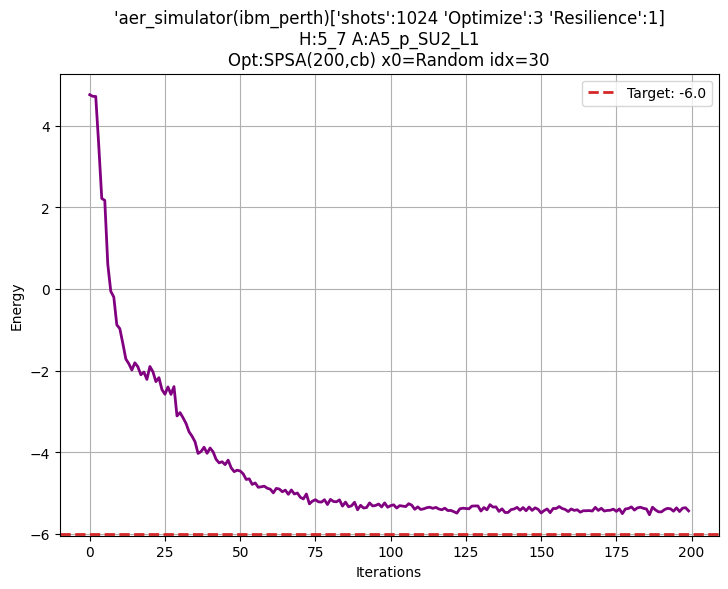

Convergence Failure
Duration 5.13914 sec Shots=None Iterations=200 Accepted=100.0 % Rejected=0 min at n=57
Expected -6.0 Ground State: Computed -5.992452 Min -6.007399 
Error 0.125796 % Minimum 0.123323 %


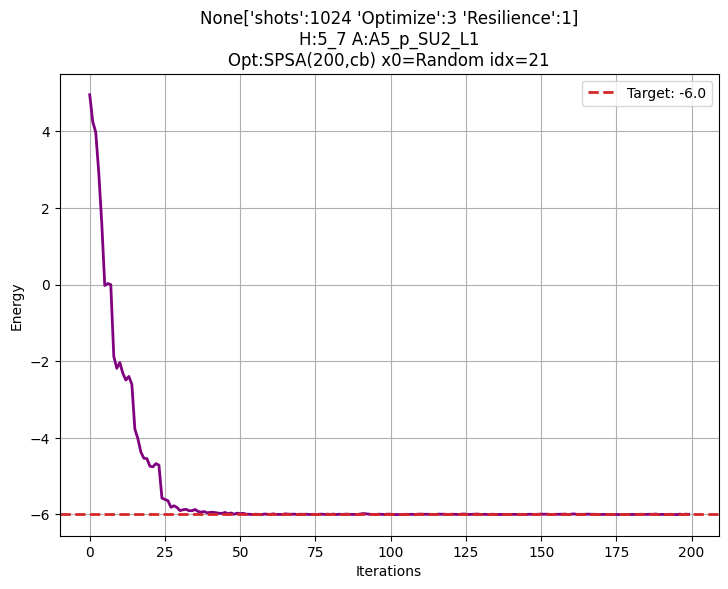

Convergence Failure
Duration 5.10701 sec Shots=None Iterations=200 Accepted=100.0 % Rejected=0 min at n=145
Expected -6.0 Ground State: Computed -5.996658 Min -6.007666 
Error 0.055704 % Minimum 0.12777 %


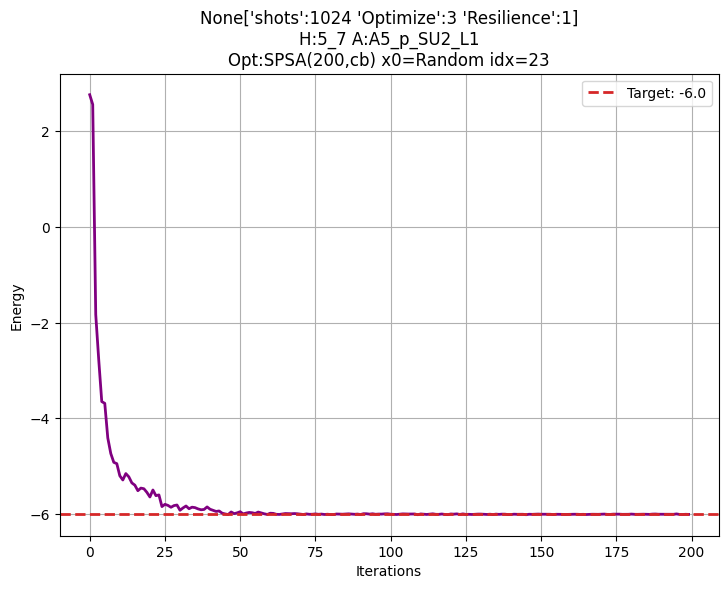

Convergence Failure
Duration 5.00065 sec Shots=None Iterations=200 Accepted=100.0 % Rejected=0 min at n=88
Expected -6.0 Ground State: Computed -5.995228 Min -6.008525 
Error 0.079533 % Minimum 0.142076 %


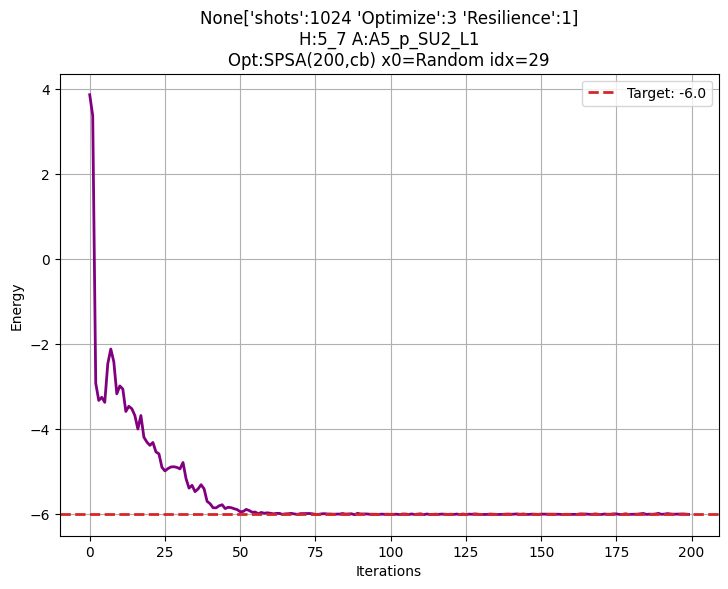

In [29]:
curCache = kagome.load_results(fname)
# kagome.list_results(curCache)
kagome.plot_SPSA_convergence(curCache,
                             indices=range(len(curCache)),
                             conv_lim = 0.03,
                             movingAvg=5,
                             perc=6,
                             convergence=False,
                             minStart=20)



# Additional Python Code to Include

In [ ]:
def getBlochCoords(state_vector,qubit,num_qubits=None):
    if num_qubits is None:
        num_qubits = len(state_vector.dims())
    if qubit >= num_qubits:
        return None

    from qiskit.quantum_info import SparsePauliOp
    Xop = SparsePauliOp.from_sparse_list([("X", [qubit], 1)], num_qubits=num_qubits)
    Yop = SparsePauliOp.from_sparse_list([("Y", [qubit], 1)], num_qubits=num_qubits)
    Zop = SparsePauliOp.from_sparse_list([("Z", [qubit], 1)], num_qubits=num_qubits)
    x = state_vector.expectation_value(Xop)
    y = state_vector.expectation_value(Yop)
    z = state_vector.expectation_value(Zop)
    return [x,y,z]

def getBlochAngles(state_vector):
    angles = []
    num_qubits = len(state_vector.dims())
    for qbit in range(num_qubits):
        coords = getBlochCoords(state_vector,qbit)
        (r,theta,phi) = cart2bloch(coords)
        angles.append([theta,phi,r])
    return angles

def getCoords(state_vector, num_qubits=None):
    coords = []
    if num_qubits is None:
        num_qubits = len(state_vector.dims())
    for qbit in range(num_qubits):
        coords.append(getBlochCoords(state_vector,qbit,num_qubits=num_qubits))
    return coords

def cart2bloch(pt):
    (x,y,z) = np.real(pt)
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    theta = np.arctan2(hxy,z)
    phi = np.arctan2(y, x)
    return r, theta, phi

def compare_edge_results(resultsA,resultsB,A=None,x=None):
    from qiskit.quantum_info import Statevector
    from qiskit.visualization import plot_bloch_multivector
    
    delExp = resultsA.values - resultsB.values
    delTot = np.sum(delExp)
    percDelE = 100*delExp/delTot
    
    edgeDel = []
    print(f"\nexpA  = {np.sum(resultsA.values):14.10f}"
          f"\nexpB  = {np.sum(resultsB.values):14.10f}"
          f"\nDelta = {delTot:14.10f}")
    print("\nEdge Deltas")
    i=0
    for idx0 in range(0,len(delExp),3):
        curEdge = delExp[idx0]+delExp[idx0+1]+delExp[idx0+2]
        edgeDel.append(curEdge)
        print(f"\t{edges[i][0]},{edges[i][1]}: {curEdge:14.10f}")
        i+=1

    print(f"\nResultsA\tResultsB\tA-B\t% Diff\n"
          f"{resultsA.values}\n{resultsB.values}\n{delExp}"
          f"\n{percDelE}\n")
    if A is not None and x is not None:
        print(f"{A.name} at x")
        qc = A.bind_parameters(x)
        svector = Statevector(qc)
        print(f"(r,theta,phi):")       
        angles = getBlochAngles(svector)
        for idx in range(len(angles)) :
            curCoord = angles[idx]
            print(f"\t{idx}: ({curCoord[2]:9.6f},{curCoord[0]:9.6f},{curCoord[1]:9.6f} )")
        return plot_bloch_multivector(svector)

In [ ]:
# Options(optimization_level=0,
#         resilience_level=0,
#         max_execution_time=None,
#         transpilation=TranspilationOptions(skip_transpilation=False, 
#                                            initial_layout=None, 
#                                            layout_method=None, 
#                                            routing_method=None, 
#                                            approximation_degree=None), 
#         resilience=ResilienceOptions(noise_amplifier='TwoQubitAmplifier', 
#                                      noise_factors=(1, 3, 5), extrapolator='LinearExtrapolator'), 
#         execution=ExecutionOptions(shots=1000, init_qubits=True), 
#         environment=EnvironmentOptions(log_level='WARNING', callback=None, job_tags=[]), 
#         simulator=SimulatorOptions(noise_model=None, seed_simulator=None, coupling_map=None, basis_gates=None)
#        )

# options.optimization_level = 0 # No optimization
# options.optimization_level = 1 # Light optimization  (Default for transpile)
# options.optimization_level = 2 # Medium optimization
# options.optimization_level = 3 # Dynamical decoupling


# options.resilience_level = 0 # No error mitigation
# options.resilience_level = 1 # T-REx
# options.resilience_level = 2 # ZNE (Zero Noise Extraction)
# options.resilience_level = 3 # PEC (Probabilistic Error Correction)

In [ ]:
# idx = -1
# curResult = curCache[idx]

# plot_bloch_multivector(VQE2MiniSvector(curResult))
# displayNormedData(curResult,nqubits=4)

# Svector_normed,_= getNormedState(curResult)
# coords=getCoords(Svector_normed)
# for q_coords in coords:
#     print(np.real(q_coords))

In [ ]:
kagome.plot_SPSA_convergence(curCache, indices=[0], convergence=False)

In [ ]:
from typing import Optional, List, Union
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import array_to_latex

def num_to_latex_ket(raw_value: complex, first_term: bool, decimals: int = 10) -> Optional[str]:
    """Convert a complex number to latex code suitable for a ket expression

    Args:
        raw_value: Value to convert
        first_term: If True then generate latex code for the first term in an expression
        decimals: Number of decimal places to round to (default: 10).
    Returns:
        String with latex code or None if no term is required
    """
    import sympy  # runtime import

    if raw_value == 0:
        value = 0
        real_value = 0
        imag_value = 0
    else:
        raw_value = np.around(raw_value, decimals=decimals)
        value = sympy.nsimplify(raw_value, constants=(sympy.pi,), rational=False)
        real_value = float(sympy.re(value))
        imag_value = float(sympy.im(value))

    element = ""
    if np.abs(value) > 0:
        latex_element = sympy.latex(value, full_prec=False)
        two_term = real_value != 0 and imag_value != 0
        if isinstance(value, sympy.core.Add):
            # can happen for expressions like 1 + sqrt(2)
            two_term = True
        if two_term:
            if first_term:
                element = f"({latex_element})"
            else:
                element = f"+ ({latex_element})"
        else:
            if first_term:
                if np.isreal(complex(value)) and value > 0:
                    element = latex_element
                else:
                    element = latex_element
                if element == "1":
                    element = ""
                elif element == "-1":
                    element = "-"
            else:

                if imag_value == 0 and real_value > 0:
                    element = "+" + latex_element
                elif real_value == 0 and imag_value > 0:
                    element = "+" + latex_element
                else:
                    element = latex_element
                if element == "+1":
                    element = "+"
                elif element == "-1":
                    element = "-"

        return element
    else:
        return None

def numbers_to_latex_terms(numbers: List[complex], decimals: int = 10) -> List[str]:
    """Convert a list of numbers to latex formatted terms

    The first non-zero term is treated differently. For this term a leading + is suppressed.

    Args:
        numbers: List of numbers to format
        decimals: Number of decimal places to round to (default: 10).
    Returns:
        List of formatted terms
    """
    first_term = True
    terms = []
    for number in numbers:
        term = num_to_latex_ket(number, first_term, decimals)
        if term is not None:
            first_term = False
        terms.append(term)
    return terms


def _state_to_latex_ket(data: List[complex], max_size: int = 12, prefix: str = "") -> str:
    """Convert state vector to latex representation

    Args:
        data: State vector
        max_size: Maximum number of non-zero terms in the expression. If the number of
                 non-zero terms is larger than the max_size, then the representation is truncated.
        prefix: Latex string to be prepended to the latex, intended for labels.

    Returns:
        String with LaTeX representation of the state vector
    """
    num = int(np.log2(len(data)))

    def ket_name(i):
        return bin(i)[2:].zfill(num)

    data = np.around(data, max_size)
    nonzero_indices = np.where(data != 0)[0].tolist()
    if len(nonzero_indices) > max_size:
        nonzero_indices = (
            nonzero_indices[: max_size // 2] + [0] + nonzero_indices[-max_size // 2 + 1 :]
        )
        latex_terms = numbers_to_latex_terms(data[nonzero_indices], max_size)
        nonzero_indices[max_size // 2] = None
    else:
        latex_terms = numbers_to_latex_terms(data[nonzero_indices], max_size)

    latex_str = ""
    for idx, ket_idx in enumerate(nonzero_indices):
        if ket_idx is None:
            latex_str += r" + \ldots "
        else:
            term = latex_terms[idx]
            ket = ket_name(ket_idx)
            latex_str += f"{term} |{ket}\\rangle\\\\"  # added \n
    return prefix + latex_str

def state_to_latex(
    state: Union[Statevector, DensityMatrix], dims: bool = None, convention: str = "ket", **args
) -> str:
    """Return a Latex representation of a state. Wrapper function
    for `qiskit.visualization.array_to_latex` for convention 'vector'.
    Adds dims if necessary.
    Intended for use within `state_drawer`.

    Args:
        state: State to be drawn
        dims (bool): Whether to display the state's `dims`
        convention (str): Either 'vector' or 'ket'. For 'ket' plot the state in the ket-notation.
                Otherwise plot as a vector
        **args: Arguments to be passed directly to `array_to_latex` for convention 'ket'

    Returns:
        Latex representation of the state
    """
    if dims is None:  # show dims if state is not only qubits
        if set(state.dims()) == {2}:
            dims = False
        else:
            dims = True

    prefix = ""
    suffix = ""
    if dims:
        prefix = "\\begin{align}\n"
        dims_str = state._op_shape.dims_l()
        suffix = f"\\\\\n\\text{{dims={dims_str}}}\n\\end{{align}}"

    operator_shape = state._op_shape
    # we only use the ket convetion for qubit statevectors
    # this means the operator shape should hve no input dimensions and all output dimensions equal to 2
    is_qubit_statevector = len(operator_shape.dims_r()) == 0 and set(operator_shape.dims_l()) == {2}
    if convention == "ket" and is_qubit_statevector:
        latex_str = _state_to_latex_ket(state._data, **args)
    else:
        latex_str = array_to_latex(state._data, source=True, **args)
    return prefix + latex_str + suffix

def svector_draw_latex(state,**drawer_args):
    from IPython.display import Latex

    return Latex(f"$${state_to_latex(state, **drawer_args)}$$")


In [ ]:
from qiskit.quantum_info import SparsePauliOp
num_qubits=8
opQCs = {
         'X0': SparsePauliOp.from_sparse_list([("X", [0], 1), ], num_qubits=num_qubits),
         'X4': SparsePauliOp.from_sparse_list([("X", [4], 1), ], num_qubits=num_qubits),
         'Y0': SparsePauliOp.from_sparse_list([("Y", [0], 1), ], num_qubits=num_qubits),
         'Y4': SparsePauliOp.from_sparse_list([("Y", [4], 1), ], num_qubits=num_qubits),
         'Z0': SparsePauliOp.from_sparse_list([("Z", [0], 1), ], num_qubits=num_qubits),
         'Z4': SparsePauliOp.from_sparse_list([("Z", [4], 1), ], num_qubits=num_qubits),
         'X1': SparsePauliOp.from_sparse_list([("X", [1], 1), ], num_qubits=num_qubits),
         'Y1': SparsePauliOp.from_sparse_list([("Y", [1], 1), ], num_qubits=num_qubits),
         'Z1': SparsePauliOp.from_sparse_list([("Z", [1], 1), ], num_qubits=num_qubits),
         'X04': SparsePauliOp.from_sparse_list([("XX", [0,4], 1), ], num_qubits=num_qubits),
         'X01': SparsePauliOp.from_sparse_list([("XX", [0,1], 1), ], num_qubits=num_qubits),
         'Y04': SparsePauliOp.from_sparse_list([("YY", [0,4], 1), ], num_qubits=num_qubits),
         'Y01': SparsePauliOp.from_sparse_list([("YY", [0,1], 1), ], num_qubits=num_qubits),
         'Z04': SparsePauliOp.from_sparse_list([("ZZ", [0,4], 1), ], num_qubits=num_qubits),
         'Z01': SparsePauliOp.from_sparse_list([("ZZ", [0,1], 1), ], num_qubits=num_qubits),
        }

svector4  = Statevector(qcInit)
svector4a = Statevector(qcInit)
svector8a = svector4.expand(svector4a)

svector8 = Statevector(qc8)
# svector12 = Statevector(qc12)
print(f"================= svector4 ===============")
svector_draw_latex(svector4,max_size=24)
print()
print(f"================= svector8 ===============")
svector_draw_latex(svector8,max_size=24)
print(f"================= svector8a ===============")
svector_draw_latex(svector8a,max_size=24)


for key, curOp in opQCs.items():
#     opVals[key] = Statevector(qc12).expectation_value(curOp)
#     print(f"exp_val.qc12({key}:{curOp.paulis})= {opVals[key]:.11f}")
    opVals[key] = Statevector(qc8).expectation_value(curOp)
    print(f"exp_val.qc08({key}:{curOp.paulis})= "
          f"{Statevector(qc8).expectation_value(curOp):.11f}")
    print(f"exp_val.qc08a({key}:{curOp.paulis})= "
          f"{svector8a.expectation_value(curOp):.11f}")

In [ ]:
num_qubits=8
edgeValues={}
xactions = [ [0,1], [0,2], [2,1], [1,3], [0,1], [0,3] ]  # 4_BC1
# xactions = [ [0,1], [0,2], [2,1], [1,3], [1,4], [3,4] ]  # 4_BC1
# xactions = [ [0,4], [1,0], [3,0],[1,4], [3,4] ]
# xactions = [ [4,5], [4,6], [6,5], [5,7], [4,5], [4,7] ]  # 4_BC1
for curXaction in xactions:
    key=f"{curXaction[0]}-{curXaction[1]}"
    while edgeValues.get(key,None) is not None:
        key += 'a'
    _=hamiltonians.BoundaryCondition(curXaction,None,num_qubits)
    edgeValues[key] = Statevector(qc8).expectation_value(
                        hamiltonians.BoundaryCondition(curXaction,None,num_qubits))
total = 0
for key,value in edgeValues.items():
    total += value
    print(f"{key}: {np.around(np.real(value),6)}")
print(f"\nTotal: {np.real(total):.6f}")

In [ ]:
import importlib
import jTools
importlib.reload(hamiltonians)
importlib.reload(ansatze)
importlib.reload(kagome)
# importlib.reload(statevector)
# importlib.reload(kagome)
jTools.cellOutputAll()

# Boundary Conditions

## Sub-lattice
### Consider the lattice consisting of Nodes 0, 1, 2, and 3

* The full lattice can be built three (3) copies of this sub-lattice
* Nodes 0, 4, and 7, the starting corners of each sub-lattice
* Impose boundary conditions between 0 <-> 4 <-> 7 <-> 0
* Solve the energy level of the sub-lattice 0 thru 4 (5 nodes)
   * Use 4 nodes (0-3)
   * Boundary conditions to map H entries from 1<->4 and 3<->4

Node 4 is  related to Node 0 such that

$$
    \psi_4  =K*\psi_0  \\
    K^3 = I
$$

Assuming symetric rotations around the lattice we have

$$  
   K_i =R_x(\theta_i)*R_y(\phi_i)*R_z(\lambda_i) \\ i\in [0,1,2]  \\
   \sum_{i=0}^2\theta_i = n*2\pi \quad n \in I \\
   \sum_{i=0}^2\phi_i = n*2\pi  \\
   \sum_{i=0}^2\lambda_i = n*2\pi  \\
$$
 
Simple starting points are

$$  
\begin{equation}
(1) \quad \theta_i = \phi_i = \lambda_i = 0  \\
(2) \quad \theta_i = \phi_i = \lambda_i = \frac{2\pi}{3}  \\
(3) \quad \theta_i = \phi_i = \lambda_i = \frac{4\pi}{3}  \label{eq1} \\
\end{equation}
$$

For case 1:
$$
K=I  \\
\psi_4 = \psi_0
$$

# Adding Boundary Conditions
## Add Hamiltonian entries on the boundary
Must add $XX + YY + ZZ$ on virtual edges of the sub-lattice for to Node 4
$$\psi_1 \psi_4 = \psi_1\psi_0 + \psi_1 (K*\psi_0) \\
\psi_3 \psi_4 = \psi_3 (K\psi_0) $$
For case 1, $K=I$ the additional Hamiltonian entries are:

\begin{align}
H_{case1} =~~ &1.0*(IIZZ+IIYY+IIXX)~~ + \\ &1.0*(ZIIZ+YIIY+XIIX) 
\end{align}
